## Data Prep

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('PC_data.csv', index_col=0)
data.head(3)

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,gross_income
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411,105943
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427,101740
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155,96130


In [ ]:
X = data.iloc[:, :10]
y = data.iloc[:, -1]

In [ ]:
X.head(3)

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155


In [ ]:
y.head(3)

,gross_income
0,105943
1,101740
2,96130


K-Means, Mean Shift and Hierarchical Clustring algorithms will be applied to the data to investigate discriminatory PCs.

##K-means Clustering

In [ ]:
#Initialize our model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)


In [ ]:
import warnings
# Suppress FutureWarning in sklearn
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.cluster._kmeans')
#Fit  model
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
k_mean_clusters = kmeans.predict(X)

In [ ]:
#Add the cluster vector to our DataFrame, X
X["Kmeans_c"] = k_mean_clusters
X.head(3)

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,Kmeans_c
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411,2
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427,2
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155,0


In [ ]:
kmeanscs = X["Kmeans_c"]

In [ ]:
kmeanscs.head(3)

,Kmeans_c
0,2
1,2
2,0


In [ ]:
X = pd.concat([X, y], axis='columns')
X.head(3)

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,Kmeans_c,gross_income
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411,2,105943
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427,2,101740
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155,0,96130


In [ ]:
X.groupby('Kmeans_c').mean()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,gross_income
Kmeans_c,,,,,,,,,,,
0,-1.055406,-0.297724,0.579788,0.044698,0.084176,0.071778,0.048084,0.131530,0.016403,-0.011037,44868.539568
1,3.142716,-0.933889,0.038907,-0.404449,0.021362,-0.001496,0.273762,0.300127,-0.059866,-0.043152,54904.927602
2,0.220014,0.850145,-0.885105,0.108152,-0.135305,-0.106844,-0.190522,-0.326900,0.001352,0.035210,39619.207640


### viz

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='First', y='Second', z='Third', color='Kmeans_c')
fig.show()

## MeanShift clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
ms = MeanShift()
ms.fit(X)

MeanShift()

In [ ]:
mean_shift_clusters = ms.predict(X)
mean_shift_clusters

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
print(len(X))
print(len(mean_shift_clusters))

2992
2992


In [ ]:
X['MSClusters'] = mean_shift_clusters
X.head(3)

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,Kmeans_c,gross_income,MSClusters
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411,2,105943,1
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427,2,101740,1
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155,0,96130,1


In [ ]:
X.groupby('MSClusters').mean()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,Kmeans_c,gross_income
MSClusters,,,,,,,,,,,,
0,-0.001539,0.010493,-0.012420,0.002553,-0.004164,-0.003480,0.005971,0.000889,0.004226,-0.002959,0.839249,43795.196246
1,0.072715,-0.495888,0.586963,-0.120671,0.196793,0.164446,-0.282177,-0.042013,-0.199707,0.139831,0.403226,80697.758065


In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='First', y='Second', z='Fourth', color='MSClusters')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='Fourth', y='Fifth', z='Third', color='MSClusters')
fig.show()

## Hierarchical Clustering Algorithm

In [ ]:
from sklearn.mixture import GaussianMixture

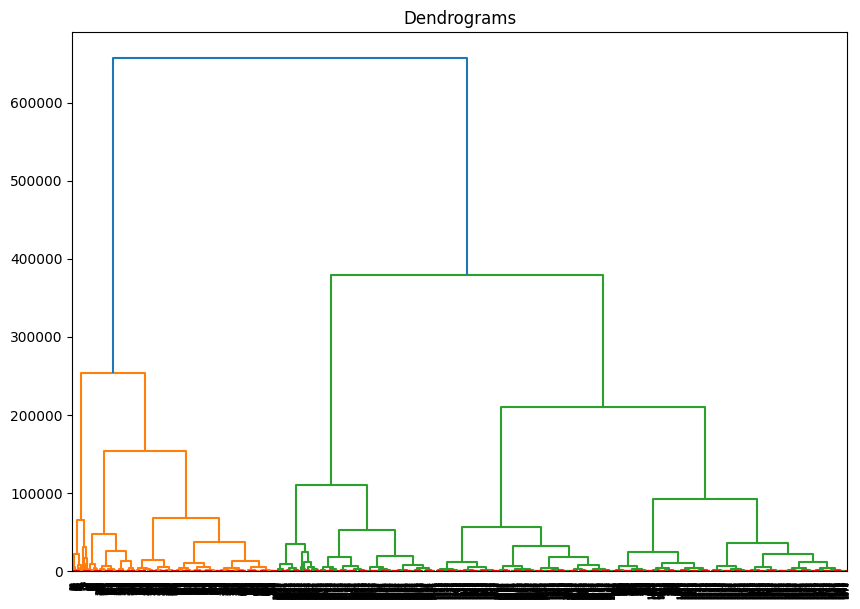

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=520, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = cluster.fit_predict(X)

In [ ]:
hierarch_clusters = clusters

In [ ]:
#Add the cluster vector to our DataFrame, X
X["Hierarch"] = hierarch_clusters
X.head(3)

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,Kmeans_c,gross_income,MSClusters,Hierarch
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411,2,105943,1,0
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427,2,101740,1,0
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155,0,96130,1,0


In [ ]:
hier_cs = X['Hierarch']
hier_cs.head(3)

,Hierarch
0,0
1,0
2,0


In [ ]:
X.groupby('Hierarch').mean()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,Kmeans_c,gross_income,MSClusters
Hierarch,,,,,,,,,,,,,
0,0.937563,-0.645027,0.125068,-0.119363,0.077973,0.268346,0.170009,-0.057084,-0.188449,-0.244048,0.703185,58801.568153,0.078981
1,-0.304726,-0.044103,0.224981,-0.009306,-0.004728,-0.056841,-0.097601,-0.001359,0.108999,0.035321,0.686792,43052.148428,0.000000
2,-0.407574,0.934310,-0.738895,0.175846,-0.087019,-0.194934,0.035217,0.076128,-0.041127,0.219476,1.361426,30325.833063,0.000000


In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='First', y='Second', z='Third', color='Hierarch')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='First', y='Fifth', z='Third', color='Hierarch')
fig.show()

 ## Merging


In [ ]:
X.head(3)

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,Kmeans_c,gross_income,MSClusters,Hierarch
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411,2,105943,1,0
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427,2,101740,1,0
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155,0,96130,1,0


In [ ]:
X.to_csv('Clustered_data.csv')